In [164]:
import numpy as np
import pandas as pd
from itertools import product
import csv
import numpy as np
 
start_value1= 9e-06 #1e-5
end_value1 =  5e-5
 
# particle_diameter_1 = 1e-4
# particle_diameter_2 = 3e-7

start_value2 = 5e-8
end_value2 = 9e-7

column_header =['particle_diameter_1', 'particle_diameter_2']
interval_1 = (end_value1-start_value1)/20
print(interval_1)
error_K_1 = interval_1**2/150*(0.001)/(1-0.1)**2
print('error_K_1 = ', error_K_1)
interval_2 = (end_value2-start_value2)/20
print(interval_2)  
error_K_2 = interval_2/1.75*0.001/(1-0.1)
print('error K_2 =', error_K_2)

array1 = np.linspace(start_value1, end_value1, 20)
array2 = np.linspace(start_value2, end_value2, 20)

combinations = list(product(array1, array2))
 
# Create a DataFrame using pandas
df = pd.DataFrame(combinations, columns=column_header)

# Save the DataFrame to a CSV file
csv_file_path = 'combinations.csv'
df.to_csv(csv_file_path, index=False)

# print(df)



2.05e-06
error_K_1 =  3.4588477366255143e-17
4.25e-08
error K_2 = 2.698412698412698e-11


In [165]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'
data20 = pd.read_csv('CT4.csv')

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1', 'particle_diameter_2']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']
df

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()

 
# The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in)
md_df = md_df.T
md_df *= 1e-6
md_df
md_df = md_df.drop(436)

# Define the name of the column to be used as the new index
new_index_column = t_header

# Set the new index using the specified column
md_df.set_index(new_index_column, inplace=True)
print('Modeling Results')
md_df


Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0.0,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,...,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919
1.0,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,...,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919,4.582919
2.0,4.582724,4.582719,4.582717,4.582716,4.582715,4.582715,4.582715,4.582714,4.582714,4.582714,...,4.289581,4.285331,4.281584,4.278254,4.275275,4.272593,4.270165,4.267957,4.265939,4.264088
3.0,4.581663,4.581612,4.581593,4.581582,4.581576,4.581572,4.581569,4.581566,4.581564,4.581563,...,3.729851,3.712537,3.696983,3.682920,3.670133,3.658448,3.647724,3.637841,3.628702,3.620222
4.0,4.578644,4.578427,4.578344,4.578300,4.578273,4.578254,4.578241,4.578231,4.578223,4.578216,...,3.191339,3.164322,3.140161,3.118414,3.098727,3.080814,3.064440,3.049411,3.035566,3.022767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431.0,0.967145,0.954868,0.950421,0.948123,0.946719,0.945773,0.945092,0.944578,0.944177,0.943855,...,0.101521,0.101518,0.101520,0.101518,0.101516,0.101519,0.101518,0.101517,0.101521,0.101519
432.0,0.964499,0.952273,0.947843,0.945555,0.944157,0.943215,0.942537,0.942025,0.941625,0.941304,...,0.101521,0.101518,0.101520,0.101518,0.101516,0.101519,0.101518,0.101517,0.101521,0.101519
433.0,0.961864,0.949688,0.945277,0.942998,0.941606,0.940668,0.939992,0.939483,0.939085,0.938765,...,0.101521,0.101518,0.101520,0.101518,0.101516,0.101519,0.101518,0.101517,0.101521,0.101519
434.0,0.959241,0.947115,0.942721,0.940452,0.939066,0.938131,0.937458,0.936951,0.936555,0.936236,...,0.101521,0.101518,0.101520,0.101518,0.101516,0.101519,0.101518,0.101517,0.101521,0.101519


(0.0, 5.0)

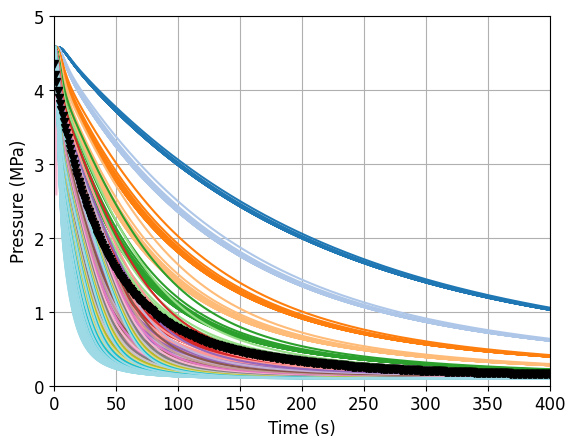

In [166]:
# Plot all pressure decays
ax = md_df.plot(colormap='tab20', legend=False)
plt.plot(data20['time'], data20['CT4_600_1']/1e6, color = 'k', marker = 'v', linestyle = '')
# plt.plot(data20['time'], data20['CT4_600_2']/1e6, color = 'k', marker = 'v', linestyle = '')
# plt.plot(data20['time'], data20['CT4_600_3']/1e6, color = 'k', marker = 'v', linestyle = '')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.grid()
plt.xlim(0, 400)
plt.ylim(0, 5)



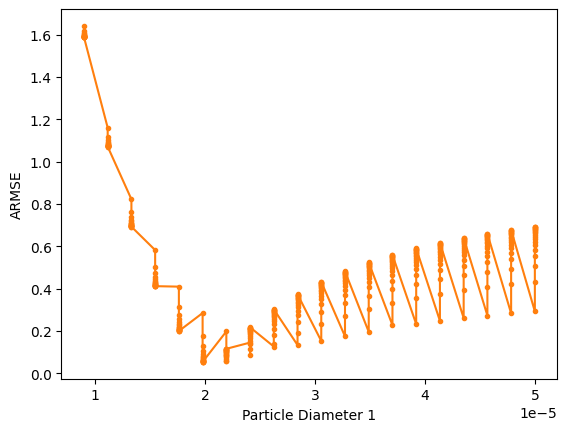

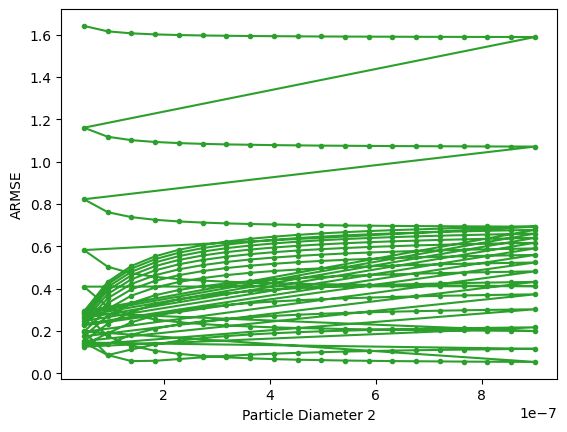

Minimum ARMSE: 0.05318659616483349
K_1 =  3.2232367794079083e-15
K_2 =  5.714285714285714e-10
particle_diameter_1 =  1.9789473684210525e-05
particle_diameter_2 =  9e-07


In [167]:


# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]): 
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 436, 436)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT4_600_1']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


parameters = pd.read_csv('combinations.csv')

plt.plot(parameters['particle_diameter_1'], ARMSE, marker = '.', color= 'C1', linestyle = '-')
plt.xlabel('Particle Diameter 1')
plt.ylabel('ARMSE')
plt.show()

plt.plot(parameters['particle_diameter_2'], ARMSE, marker = '.', color = 'C2', linestyle = '-')
plt.xlabel('Particle Diameter 2')
plt.ylabel('ARMSE')
plt.show()

minimum_ARMSE = min(ARMSE)
print('Minimum ARMSE: ' + str(minimum_ARMSE))
min_index_1 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*0.001/(1-0.1)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*0.001/(1-0.1)
print("K_2 = ", K_2)

print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])

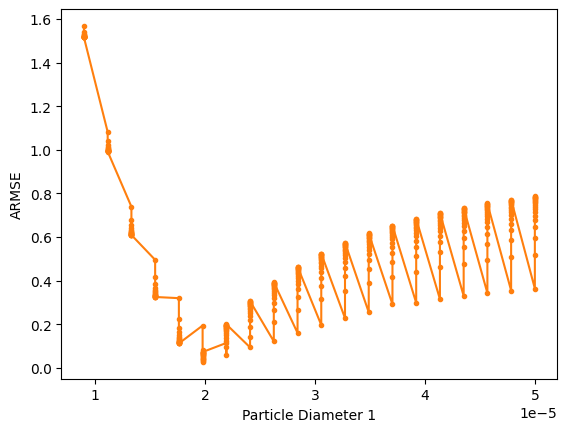

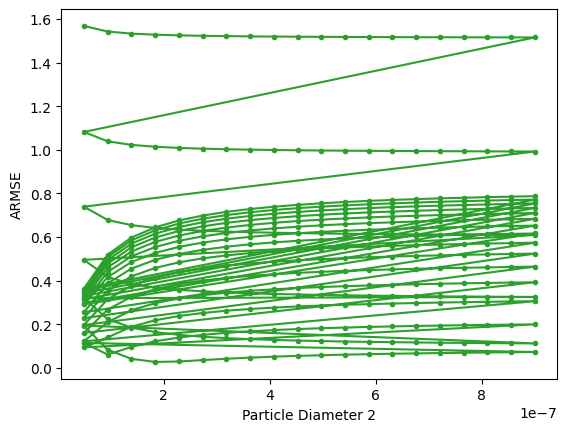

Minimum ARMSE: 0.027548320508156723
K_1 =  3.2232367794079083e-15
K_2 =  5.714285714285714e-10
particle_diameter_1 =  1.9789473684210525e-05
particle_diameter_2 =  9e-07


In [168]:
# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 436, 436)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT4_600_2']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 

parameters = pd.read_csv('combinations.csv')

plt.plot(parameters['particle_diameter_1'], ARMSE, marker = '.', color= 'C1', linestyle = '-')
plt.xlabel('Particle Diameter 1')
plt.ylabel('ARMSE')
plt.show()

plt.plot(parameters['particle_diameter_2'], ARMSE, marker = '.', color = 'C2', linestyle = '-')
plt.xlabel('Particle Diameter 2')
plt.ylabel('ARMSE')
plt.show()

minimum_ARMSE = min(ARMSE)
print('Minimum ARMSE: ' + str(minimum_ARMSE))
min_index_2 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*0.001/(1-0.1)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*0.001/(1-0.1)
print("K_2 = ", K_2)

print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])

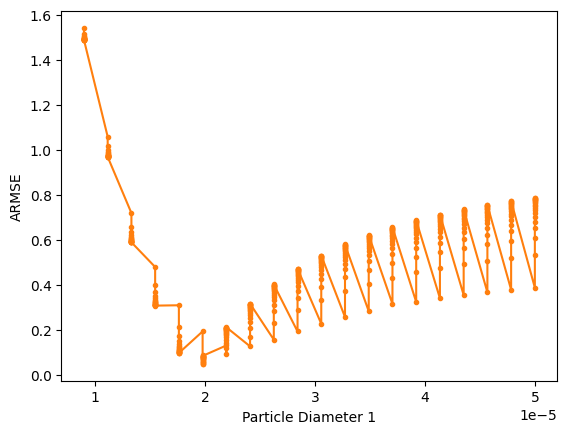

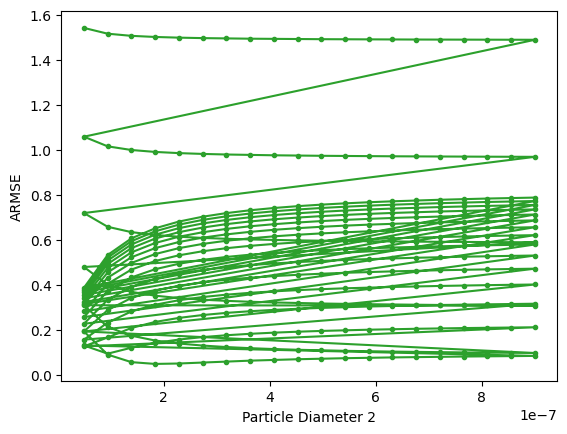

Minimum ARMSE: 0.04746916049897646
K_1 =  3.2232367794079083e-15
K_2 =  5.714285714285714e-10
particle_diameter_1 =  1.9789473684210525e-05
particle_diameter_2 =  9e-07


In [169]:
# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 436, 436)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT4_600_3']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


parameters = pd.read_csv('combinations.csv')

plt.plot(parameters['particle_diameter_1'], ARMSE, marker = '.', color= 'C1', linestyle = '-')
plt.xlabel('Particle Diameter 1')
plt.ylabel('ARMSE')
plt.show()

plt.plot(parameters['particle_diameter_2'], ARMSE, marker = '.', color = 'C2', linestyle = '-')
plt.xlabel('Particle Diameter 2')
plt.ylabel('ARMSE')
plt.show()

minimum_ARMSE = min(ARMSE)
print('Minimum ARMSE: ' + str(minimum_ARMSE))
min_index_3 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*0.001/(1-0.1)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*0.001/(1-0.1)
print("K_2 = ", K_2)

print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])

(0.0, 5.0)

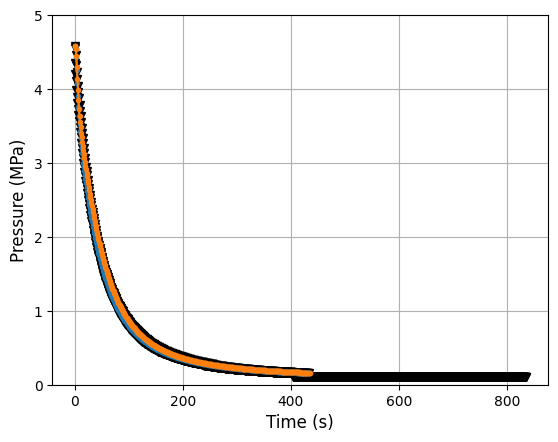

In [170]:
# Plot all pressure decays
plt.plot(data20['time'], data20['CT4_600_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['CT4_600_2']/1e6, color = 'k', marker = 'v', linestyle = '')
md_df[min_index_1].plot(marker = '.')
md_df[min_index_2].plot(marker = '.')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.grid()
plt.ylim(0, 5)
